In [1]:
import pandas as pd 
import numpy as np 
import tensorflow  as tf 
import nltk 
from sklearn import datasets
import re
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
news = pd.read_csv("validation.csv")

In [3]:
news

,id,article,highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...
...,...,...,...
13363,e93f721ba4949f21f33549c4a21d55ff456af979,All shops will be allowed to offer ‘click and ...,Shops won't have to apply for planning permiss...
13364,8df19a570ad14119a7d00f3bbe864fedf8c1691d,Mo Farah has had his nationality called into q...,Mo Farah broke the European half-marathon reco...
13365,2fdd5f89aa26e91ceea9b0ef264abfcfc3e6fa2e,Wolves kept their promotion hopes alive with a...,Wolves are three points off the play-off place...
13366,530d7b18d7a715b368b0745f9dfebfe353adeda8,A Brown University graduate student has died ...,"Hyoun Ju Sohn, a 25-year-old doctoral student,..."


In [4]:
news.shape

(13368, 3)

In [5]:
news.describe()

,id,article,highlights
count,13368,13368,13368
unique,13368,13368,13300
top,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...",This page includes the show Transcript .\nUse ...
freq,1,1,16


In [6]:
# Calculate the length of the article.
news['article_len'] = news['article'].apply(lambda x: len(x.split()))

# Calculate the length of the highlights.
news['highlights_len'] = news['highlights'].apply(lambda x: len(x.split()))

# Print the results.
print(news[['article_len', 'highlights_len']])

       article_len  highlights_len
0              264              58
1              551              36
2              465             114
3              580              51
4              338              36
...            ...             ...
13363          365              26
13364          318              38
13365          579              39
13366          269              30
13367          931              75

[13368 rows x 2 columns]


In [7]:
train = pd.read_csv("trainnlp.csv")
train

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


In [8]:
train.isna().sum()

id            0
article       0
highlights    0
dtype: int64

In [9]:
train.describe()

,id,article,highlights
count,287113,287113,287113
unique,287113,284005,282197
top,0001d1afc246a7964130f43ae940af6bc6c57f01,(CNN) -- Dubai could lose its place on the Wom...,This page includes the show Transcript and the...
freq,1,3,83


In [10]:
train.shape

(287113, 3)

In [11]:
test = pd.read_csv("testnlp.csv")
test

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


In [12]:
test.shape

(11490, 3)

In [13]:
test.describe

<bound method NDFrame.describe of                                              id   
0      92c514c913c0bdfe25341af9fd72b29db544099b  \
1      2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2      91b7d2311527f5c2b63a65ca98d21d9c92485149   
3      caabf9cbdf96eb1410295a673e953d304391bfbb   
4      3da746a7d9afcaa659088c8366ef6347fe6b53ea   
...                                         ...   
11485  ed8674cc15b29a87d8df8de1efee353d71122272   
11486  2f58d1a99e9c47914e4b1c31613e3a041cd9011e   
11487  411f6d57825161c3a037b4742baccd6cd227c0c3   
11488  b5683ef8342056b17b068e0d59bdbe87e3fe44ea   
11489  a6a5491edb0c96c4391b6a8c4504416b3572b3a1   

                                                 article   
0      Ever noticed how plane seats appear to be gett...  \
1      A drunk teenage boy had to be rescued by secur...   
2      Dougie Freedman is on the verge of agreeing a ...   
3      Liverpool target Neto is also wanted by PSG an...   
4      Bruce Jenner will break his silence in a two-h

In [14]:
test.describe()

,id,article,highlights
count,11490,11490,11490
unique,11490,11488,11449
top,92c514c913c0bdfe25341af9fd72b29db544099b,Defiant Nigel Farage today insisted he did not...,Ukip leader Nigel Farage risks alienating thos...
freq,1,2,3


In [15]:
document = news['highlights']
document

0        Sally Forrest, an actress-dancer who graced th...
1        Works include pictures of Presidential Palace ...
2        Iftekhar Murtaza, 29, was convicted a year ago...
3        Prince Harry in attendance for England's crunc...
4        Nick Slater's colleagues uploaded a picture to...
                               ...                        
13363    Shops won't have to apply for planning permiss...
13364    Mo Farah broke the European half-marathon reco...
13365    Wolves are three points off the play-off place...
13366    Hyoun Ju Sohn, a 25-year-old doctoral student,...
13367    60% of estate agents believe owning a home is ...
Name: highlights, Length: 13368, dtype: object

In [16]:
summary = news['highlights']
summary

0        Sally Forrest, an actress-dancer who graced th...
1        Works include pictures of Presidential Palace ...
2        Iftekhar Murtaza, 29, was convicted a year ago...
3        Prince Harry in attendance for England's crunc...
4        Nick Slater's colleagues uploaded a picture to...
                               ...                        
13363    Shops won't have to apply for planning permiss...
13364    Mo Farah broke the European half-marathon reco...
13365    Wolves are three points off the play-off place...
13366    Hyoun Ju Sohn, a 25-year-old doctoral student,...
13367    60% of estate agents believe owning a home is ...
Name: highlights, Length: 13368, dtype: object

In [17]:
news = news.reset_index(drop=True)
document = document.reset_index(drop=True)
summary= summary.reset_index(drop=True)

In [18]:
document

0        Sally Forrest, an actress-dancer who graced th...
1        Works include pictures of Presidential Palace ...
2        Iftekhar Murtaza, 29, was convicted a year ago...
3        Prince Harry in attendance for England's crunc...
4        Nick Slater's colleagues uploaded a picture to...
                               ...                        
13363    Shops won't have to apply for planning permiss...
13364    Mo Farah broke the European half-marathon reco...
13365    Wolves are three points off the play-off place...
13366    Hyoun Ju Sohn, a 25-year-old doctoral student,...
13367    60% of estate agents believe owning a home is ...
Name: highlights, Length: 13368, dtype: object

In [19]:
document[20], summary[30]

("South Africa-born Grant Elliott hit match-winning 84 not out in semi-final .\nBlack Caps reached first World Cup final with Elliott's penultimate ball six .\nElliott, 36, had not played international cricket for 14 months when picked .\nWin is vindication for the attacking brand played under Brendon McCullum .\nNew Zealand play the winner of the semi-final between Australia or India .",
 "Female engineer Tina Huang is suing Twitter for gender discrimination .\nClaims she was overlooked for promotion in favour of male colleagues .\nSays the Silicon Valley firm has no formal procedure for promotions .\nAnd alleges there was a 'shoulder tap' process that favoured men .\nTwitter says it is committed to diversity and that she was treated fairly .\nComes as Silicon Valley rocked by two other high profile lawsuits .")

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [21]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
freqTable = dict()

In [22]:
print(stopwords)

['however', 'elsewhere', 'him', 'used', 'beyond', 'into', 'name', 'than', 'twenty', 'both', 'hereupon', 'say', 'if', 'to', 'take', 'afterwards', 'n‘t', 'eleven', 'should', 'what', 'myself', 'whoever', '‘m', 'serious', 'toward', 'not', 'across', 'various', 'itself', '‘re', 'being', 'hers', 'of', 'four', 'either', 'around', 'himself', 'had', 'this', 'latter', 'eight', 'whatever', '‘s', 'anyway', 'give', 'somehow', 'always', 'yours', '’s', 'anything', 'does', 'his', 'may', 'none', 'above', 'just', 'very', 'did', 'our', 'keep', 'seemed', 'everyone', 'another', 'along', 'under', 'off', 'with', 'else', 'besides', 'must', 'whereupon', 'as', 'same', 'nothing', 'several', 'thereupon', 'your', '‘d', 'two', 'wherever', 'almost', 'every', 'side', 'for', '‘ll', 'quite', 'an', 'will', 'even', 'also', 'few', 'meanwhile', 'become', 'yet', 'some', 'ever', 'thus', 'enough', 'therefore', 'more', 'someone', '’ll', 'whereafter', 'be', 'out', 'five', 'otherwise', 'show', 'has', 'can', 'her', "'d", 'go', 'or

In [23]:
# for decoder sequence
summary = summary.apply(lambda x: '<go> ' + x + ' <stop>')
summary.head()

0    <go> Sally Forrest, an actress-dancer who grac...
1    <go> Works include pictures of Presidential Pa...
2    <go> Iftekhar Murtaza, 29, was convicted a yea...
3    <go> Prince Harry in attendance for England's ...
4    <go> Nick Slater's colleagues uploaded a pictu...
Name: highlights, dtype: object

In [24]:
summary.head()

0    <go> Sally Forrest, an actress-dancer who grac...
1    <go> Works include pictures of Presidential Pa...
2    <go> Iftekhar Murtaza, 29, was convicted a yea...
3    <go> Prince Harry in attendance for England's ...
4    <go> Nick Slater's colleagues uploaded a pictu...
Name: highlights, dtype: object

In [25]:
# since < and > from default tokens cannot be removed
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'


In [26]:
document_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)
document

0        Sally Forrest, an actress-dancer who graced th...
1        Works include pictures of Presidential Palace ...
2        Iftekhar Murtaza, 29, was convicted a year ago...
3        Prince Harry in attendance for England's crunc...
4        Nick Slater's colleagues uploaded a picture to...
                               ...                        
13363    Shops won't have to apply for planning permiss...
13364    Mo Farah broke the European half-marathon reco...
13365    Wolves are three points off the play-off place...
13366    Hyoun Ju Sohn, a 25-year-old doctoral student,...
13367    60% of estate agents believe owning a home is ...
Name: highlights, Length: 13368, dtype: object

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [28]:
document_tokenizer.fit_on_texts(document)
summary_tokenizer.fit_on_texts(summary)
summary

0        <go> Sally Forrest, an actress-dancer who grac...
1        <go> Works include pictures of Presidential Pa...
2        <go> Iftekhar Murtaza, 29, was convicted a yea...
3        <go> Prince Harry in attendance for England's ...
4        <go> Nick Slater's colleagues uploaded a pictu...
                               ...                        
13363    <go> Shops won't have to apply for planning pe...
13364    <go> Mo Farah broke the European half-marathon...
13365    <go> Wolves are three points off the play-off ...
13366    <go> Hyoun Ju Sohn, a 25-year-old doctoral stu...
13367    <go> 60% of estate agents believe owning a hom...
Name: highlights, Length: 13368, dtype: object

In [29]:
inputs = document_tokenizer.texts_to_sequences(document)
inputs


[[4096,
  4923,
  36,
  1467,
  6566,
  53,
  24452,
  2,
  2901,
  2577,
  2239,
  2,
  24453,
  6,
  24454,
  4,
  5185,
  24455,
  6,
  3156,
  139,
  9,
  203,
  229,
  4923,
  1879,
  775,
  608,
  8,
  7017,
  24456,
  35,
  277,
  3781,
  479,
  5,
  1103,
  1240,
  3347,
  4923,
  503,
  5,
  24457,
  7,
  2074,
  24458,
  17345,
  24459,
  53,
  2902,
  18,
  4,
  4489,
  4097,
  4,
  3156],
 [1405,
  453,
  531,
  7,
  2032,
  1032,
  6,
  11720,
  1224,
  1208,
  16,
  9128,
  70,
  62,
  2523,
  7,
  1562,
  9,
  1563,
  4,
  46,
  40,
  59,
  2033,
  215,
  187,
  3,
  440,
  4,
  404,
  7,
  24460,
  6,
  17346],
 [24461,
  13884,
  764,
  8,
  612,
  5,
  30,
  372,
  7,
  699,
  14,
  460,
  7558,
  102,
  4,
  5,
  13885,
  236,
  9,
  2,
  102,
  58,
  4,
  1504,
  9,
  214,
  12,
  8,
  1043,
  3,
  144,
  4,
  3060,
  639,
  57,
  388,
  7,
  3061,
  24462,
  17347,
  2105,
  17348,
  2,
  2655,
  7,
  14,
  172,
  30,
  38,
  287,
  24463,
  6,
  2578,
  37,
  1330

In [30]:
targets = summary_tokenizer.texts_to_sequences(summary)
targets

[[8,
  4098,
  4925,
  38,
  1469,
  6568,
  55,
  24454,
  2,
  2903,
  2579,
  2241,
  2,
  24455,
  6,
  24456,
  4,
  5187,
  24457,
  6,
  3158,
  141,
  11,
  205,
  231,
  4925,
  1881,
  777,
  610,
  10,
  7019,
  24458,
  37,
  279,
  3783,
  481,
  5,
  1105,
  1242,
  3349,
  4925,
  505,
  5,
  24459,
  7,
  2076,
  24460,
  17347,
  24461,
  55,
  2904,
  20,
  4,
  4491,
  4099,
  4,
  3158,
  9],
 [8,
  1407,
  455,
  533,
  7,
  2034,
  1034,
  6,
  11722,
  1226,
  1210,
  18,
  9130,
  72,
  64,
  2525,
  7,
  1564,
  11,
  1565,
  4,
  48,
  42,
  61,
  2035,
  217,
  189,
  3,
  442,
  4,
  406,
  7,
  24462,
  6,
  17348,
  9],
 [8,
  24463,
  13886,
  766,
  10,
  614,
  5,
  32,
  374,
  7,
  701,
  16,
  462,
  7560,
  104,
  4,
  5,
  13887,
  238,
  11,
  2,
  104,
  60,
  4,
  1506,
  11,
  216,
  14,
  10,
  1045,
  3,
  146,
  4,
  3062,
  641,
  59,
  390,
  7,
  3063,
  24464,
  17349,
  2107,
  17350,
  2,
  2657,
  7,
  16,
  174,
  32,
  40,
  289,
  

In [31]:
summary_tokenizer.texts_to_sequences(["New Zealand’s rugby triumphs than cricketing ones"])


[[49, 1, 1172, 17525, 71, 36877, 2930]]

In [32]:
summary_tokenizer.sequences_to_texts([[49, 1, 1172, 17525, 71, 36877, 2930]])


['new <unk> rugby triumphs than cricketing ones']

In [33]:
encoder_vocab_size = len(document_tokenizer.word_index) + 1
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

# vocab_size
encoder_vocab_size, decoder_vocab_size

(48626, 48628)

In [34]:
document_lengths = pd.Series([len(x) for x in document])
summary_lengths = pd.Series([len(x) for x in summary])

In [35]:
document_lengths.describe()

count    13368.000000
mean       328.033513
std        146.304859
min         52.000000
25%        229.000000
50%        299.000000
75%        386.000000
max       8541.000000
dtype: float64

In [36]:
summary_lengths.describe()

count    13368.000000
mean       340.033513
std        146.304859
min         64.000000
25%        241.000000
50%        311.000000
75%        398.000000
max       8553.000000
dtype: float64

In [37]:
# maxlen
# taking values > and round figured to 75th percentile
# at the same time not leaving high variance
encoder_maxlen = 400
decoder_maxlen = 100
encoder_maxlen

400

In [38]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')
targets

array([[    8,  4098,  4925, ...,     0,     0,     0],
       [    8,  1407,   455, ...,     0,     0,     0],
       [    8, 24463, 13886, ...,   174,    32,    40],
       ...,
       [    8,  3566,    28, ...,     0,     0,     0],
       [    8, 48620, 48621, ...,     0,     0,     0],
       [    8,   950,     7, ...,     0,     0,     0]])

In [39]:
inputs

array([[ 4096,  4923,    36, ...,     0,     0,     0],
       [ 1405,   453,   531, ...,     0,     0,     0],
       [24461, 13884,   764, ...,     0,     0,     0],
       ...,
       [ 3564,    26,    63, ...,     0,     0,     0],
       [48618, 48619, 48620, ...,     0,     0,     0],
       [  948,     7,  1763, ...,     0,     0,     0]])

Creatuing Dataset pipline

In [40]:
inputs = tf.cast(inputs, dtype=tf.int32)
targets = tf.cast(targets, dtype=tf.int32)
targets

<tf.Tensor: shape=(13368, 100), dtype=int32, numpy=
array([[    8,  4098,  4925, ...,     0,     0,     0],
       [    8,  1407,   455, ...,     0,     0,     0],
       [    8, 24463, 13886, ...,   174,    32,    40],
       ...,
       [    8,  3566,    28, ...,     0,     0,     0],
       [    8, 48620, 48621, ...,     0,     0,     0],
       [    8,   950,     7, ...,     0,     0,     0]])>

In [41]:
inputs[0]

<tf.Tensor: shape=(400,), dtype=int32, numpy=
array([ 4096,  4923,    36,  1467,  6566,    53, 24452,     2,  2901,
        2577,  2239,     2, 24453,     6, 24454,     4,  5185, 24455,
           6,  3156,   139,     9,   203,   229,  4923,  1879,   775,
         608,     8,  7017, 24456,    35,   277,  3781,   479,     5,
        1103,  1240,  3347,  4923,   503,     5, 24457,     7,  2074,
       24458, 17345, 24459,    53,  2902,    18,     4,  4489,  4097,
           4,  3156,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [42]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64


In [43]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 400), dtype=tf.int32, name=None), TensorSpec(shape=(None, 100), dtype=tf.int32, name=None))>

In [44]:
import matplotlib.pyplot as plt

In [45]:
document_count = [23]
summary_count = [34]
summary

0        <go> Sally Forrest, an actress-dancer who grac...
1        <go> Works include pictures of Presidential Pa...
2        <go> Iftekhar Murtaza, 29, was convicted a yea...
3        <go> Prince Harry in attendance for England's ...
4        <go> Nick Slater's colleagues uploaded a pictu...
                               ...                        
13363    <go> Shops won't have to apply for planning pe...
13364    <go> Mo Farah broke the European half-marathon...
13365    <go> Wolves are three points off the play-off ...
13366    <go> Hyoun Ju Sohn, a 25-year-old doctoral stu...
13367    <go> 60% of estate agents believe owning a hom...
Name: highlights, Length: 13368, dtype: object

In [46]:
graph_df= pd.DataFrame()
graph_df['document']=document_count
graph_df['summary']=summary_count

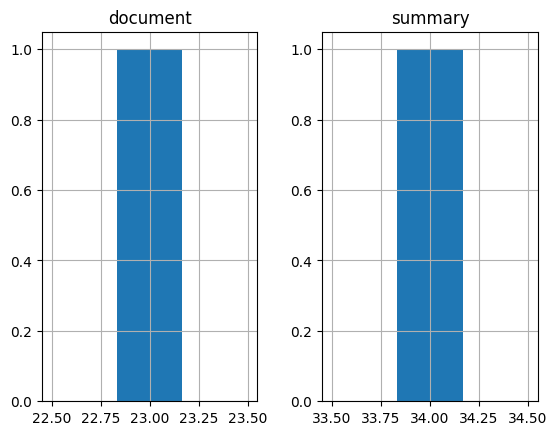

In [47]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 3)
plt.show()

In [48]:
len(document)

13368

In [49]:
len(summary)

13368

In [50]:
len(test)

11490

In [51]:
sample = news.sample()
print('**Article:')
print(sample.article.values)
print()
print('-'*10)
print()
print('**Highlight:')
print(sample.highlights.values)

**Article:
["A company advertising a competition to win a £2,000 luxury holiday to Ireland have blundered by using a photo of a castle in Scotland. And the mistake has been met with anger by officials at popular tourist hotspot north of the border. The contest to win a trip to the Emerald Isle is being promoted with a picture of Eilean Donan Castle, which is in the western Highlands  and seen by many as one of Scotland's most famous castle. WomenFreebies.co.uk used a photo of Scottish Castle Eilean Donan to advertise a competition for Ireland . Unsurprisingly, the use of the Scottish castle advertising a holiday to Ireland didn't go down too well... The Eilean Donan Castle officials had some words of advice for the website WomenFreebies.co.uk . The image was posted to the Facebook page of WomenFreebies.co.uk with the caption 'Like if you'd love to visit Ireland'. The page has almost 800,000 followers and thousands liked the post, but eagle-eyed Scots spotted the gaffe and pointed out t

In [52]:
sample = train.sample()
print('**Article:')
print(sample.article.values)
print()
print('-'*50)
print()
print('**Highlight:')
print(sample.highlights.values)


**Article:
["By . Associated Press . A former city official who became a . symbol of municipal greed was sentenced Wednesday to 12 years in prison â€” less than half the time it will take the nearly bankrupt Los Angeles . suburb of Bell to dig itself out of the estimated $150 million in debt . he left behind. A judge . also ordered former Bell city manager Robert Rizzo to make $8.8 million . in restitution, but prosecutors say that only covers the money he . illegally took for himself. In . all, Rizzo cost the modest city more than $150 million in legal fees . and illegally collected taxes that must be repaid, said prosecutors and . Bell officials. 'That resulted in borrowing that will not be paid back until 2040,' Anthony Taylor, an attorney representing the city of Bell, told Los Angeles County Superior Court Judge Kathleen Kennedy. Fat cat: Robert Rizzo, left, leaves court after being sentenced, Wednesday April 16, 2014 in Los Angeles . Rizzo . was arrested in 2010 after it was reve

In [53]:
# Calculate the length of the article.
train['article_len'] = train['article'].apply(lambda x: len(x.split()))

# Calculate the length of the highlights.
train['highlights_len'] = news['highlights'].apply(lambda x: len(x.split()))

# Print the results.
print(train[['article_len', 'highlights_len']])

        article_len  highlights_len
0               198            58.0
1               392            36.0
2               808           114.0
3               531            51.0
4               580            36.0
...             ...             ...
287108          537             NaN
287109         1056             NaN
287110          856             NaN
287111          780             NaN
287112          974             NaN

[287113 rows x 2 columns]


In [54]:
# Calculate the length of the article.
news['article_len'] = news['article'].apply(lambda x: len(x.split()))

# Calculate the length of the highlights.
news['highlights_len'] = news['highlights'].apply(lambda x: len(x.split()))

# Print the results.
print(news[['article_len', 'highlights_len']])

       article_len  highlights_len
0              264              58
1              551              36
2              465             114
3              580              51
4              338              36
...            ...             ...
13363          365              26
13364          318              38
13365          579              39
13366          269              30
13367          931              75

[13368 rows x 2 columns]


In [55]:
train.isna().sum()

id                     0
article                0
highlights             0
article_len            0
highlights_len    273745
dtype: int64

In [56]:
news.isna().sum()

id                0
article           0
highlights        0
article_len       0
highlights_len    0
dtype: int64

Check Duplicates

In [57]:
train = train.drop_duplicates(subset= ['article', 'highlights'])
train.shape

(284015, 5)

In [58]:
#
#def highlights_len(row):
    #return len(row['highlights'].split())
#train['article_len'] = train.apply(lambda r: article_len(r), axis=1)

#train['highlights_len'] = train.apply(lambda r:highlights_len(r), axis= 1)
      
    


Check No. Unique values of ids¶


drop id columns because it has no info

Show some Summary statistics about article_len and highlights_num¶


In [59]:
news.id.nunique()

13368

In [60]:
MAX_LEN = 512
SUMMARY_LEN = 150
TRAINNING_SIZE = 5000

In [61]:
news.head()
news

,id,article,highlights,article_len,highlights_len
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th...",264,58
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...,551,36
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago...",465,114
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...,580,51
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...,338,36
...,...,...,...,...,...
13363,e93f721ba4949f21f33549c4a21d55ff456af979,All shops will be allowed to offer ‘click and ...,Shops won't have to apply for planning permiss...,365,26
13364,8df19a570ad14119a7d00f3bbe864fedf8c1691d,Mo Farah has had his nationality called into q...,Mo Farah broke the European half-marathon reco...,318,38
13365,2fdd5f89aa26e91ceea9b0ef264abfcfc3e6fa2e,Wolves kept their promotion hopes alive with a...,Wolves are three points off the play-off place...,579,39
13366,530d7b18d7a715b368b0745f9dfebfe353adeda8,A Brown University graduate student has died ...,"Hyoun Ju Sohn, a 25-year-old doctoral student,...",269,30


In [62]:
def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    

In [63]:
import heapq

In [64]:
train.duplicated(subset= ['article', 'highlights']).sum()
train

,id,article,highlights,article_len,highlights_len
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,58.0
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,36.0
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,114.0
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,51.0
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,36.0
...,...,...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...,537,NaN
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ...",1056,NaN
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...,856,NaN
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...,780,NaN


In [65]:
train= train.drop_duplicates(subset= ['article', 'highlights'])
train.shape

(284015, 5)

In [66]:
from rouge import Rouge


In [67]:
def calculate_summary_score(scores):
    # Perform calculations based on your formula
    # For example, let's calculate the average of the scores
    total = sum(scores)
    count = len(scores)
    summary_score = total / count

    return summary_score



In [68]:
scores = [49, 1, 1172, 17525, 71, 36877, 2930]
summary_score = calculate_summary_score(scores)
print("Summary Score:", summary_score)


Summary Score: 8375.0


In [69]:
import transformers
from transformers import pipeline

In [70]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [71]:
news = []
news_count = 0
for sentence in train['article']:
    news_count += 4
    sentence_tokens = word_tokenize(sentence)
    news.append(sentence_tokens)
    if news_count >= 4:
        break

In [72]:
print(news)

[['By', '.', 'Associated', 'Press', '.', 'PUBLISHED', ':', '.', '14:11', 'EST', ',', '25', 'October', '2013', '.', '|', '.', 'UPDATED', ':', '.', '15:36', 'EST', ',', '25', 'October', '2013', '.', 'The', 'bishop', 'of', 'the', 'Fargo', 'Catholic', 'Diocese', 'in', 'North', 'Dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'Fargo', ',', 'Grand', 'Forks', 'and', 'Jamestown', 'to', 'the', 'hepatitis', 'A', 'virus', 'in', 'late', 'September', 'and', 'early', 'October', '.', 'The', 'state', 'Health', 'Department', 'has', 'issued', 'an', 'advisory', 'of', 'exposure', 'for', 'anyone', 'who', 'attended', 'five', 'churches', 'and', 'took', 'communion', '.', 'Bishop', 'John', 'Folda', '(', 'pictured', ')', 'of', 'the', 'Fargo', 'Catholic', 'Diocese', 'in', 'North', 'Dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'Fargo', ',', 'Grand', 'Forks', 'and', 'Jamestown', 'to', 'the', 'hepatitis', 'A', '.', 'State', 'Immunizati

In [73]:
formatted_news = []
for sentence in news:
    formatted_words = []
    for word in sentence:
            formatted_words.append(word.lower())
    formatted_news.append(formatted_words)

In [74]:
formatted_news

[['by',
  '.',
  'associated',
  'press',
  '.',
  'published',
  ':',
  '.',
  '14:11',
  'est',
  ',',
  '25',
  'october',
  '2013',
  '.',
  '|',
  '.',
  'updated',
  ':',
  '.',
  '15:36',
  'est',
  ',',
  '25',
  'october',
  '2013',
  '.',
  'the',
  'bishop',
  'of',
  'the',
  'fargo',
  'catholic',
  'diocese',
  'in',
  'north',
  'dakota',
  'has',
  'exposed',
  'potentially',
  'hundreds',
  'of',
  'church',
  'members',
  'in',
  'fargo',
  ',',
  'grand',
  'forks',
  'and',
  'jamestown',
  'to',
  'the',
  'hepatitis',
  'a',
  'virus',
  'in',
  'late',
  'september',
  'and',
  'early',
  'october',
  '.',
  'the',
  'state',
  'health',
  'department',
  'has',
  'issued',
  'an',
  'advisory',
  'of',
  'exposure',
  'for',
  'anyone',
  'who',
  'attended',
  'five',
  'churches',
  'and',
  'took',
  'communion',
  '.',
  'bishop',
  'john',
  'folda',
  '(',
  'pictured',
  ')',
  'of',
  'the',
  'fargo',
  'catholic',
  'diocese',
  'in',
  'north',
  'dak

In [75]:
sample = train.sample()
print('**Article:')
print(sample.article.values)
print()
print('-'*2)
print()
print('**Highlight:')
print(sample.highlights.values)

**Article:
["Newcastle United recorded a night to remember on Wednesday as Alan Pardew's side earned a place in the Capital One Cup quarter-finals after a 2-0 win against Manchester City. Goals from Rolando Aarons and Moussa Sissoko ensured the win for the Magpies against a City side which started with Yaya Toure, David Silva and Edin Dzeko. Here,\xa0Sportsmail's\xa0Craig Hope gives his verdict on how the players performed at the Etihad. Rolando Aarons (centre) wheels away in celebration after his early goal against Manchester City . MANCHESTER CITY: (4-2-3-1) Willy Caballero 5.5 . Nutmegged for the opener and beaten quite easily for the second, did little to press claims for a run in the team. Bacary Sagna 5.5 . Done all ends up for Sissoko’s excellent second and did not get to grips with Aarons all night. Martin Demichelis 5.5 . Dithered when presented with one glorious first-half chance to level. Eliaquim Mangala 5 . Clumsy – he looks anything but a £30million Premier League centre 

In [76]:
train = train.drop('id', axis= 1)
train.head(3)


,article,highlights,article_len,highlights_len
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,58.0
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,36.0
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,114.0


In [77]:
train.describe()

,article_len,highlights_len
count,284015.000000,13364.000000
mean,692.231660,57.909758
std,336.649158,25.616770
min,8.000000,10.000000
25%,443.000000,41.000000
50%,632.000000,54.000000
75%,877.000000,69.000000
max,2347.000000,1440.000000


In [78]:
sent = []
sent_count = 0
for sentence in train['article']:
    sent_count += 1
    sentence_tokens = word_tokenize(sentence)
    sent.append(sentence_tokens)
    if sent_count >= 1:
        break

In [79]:
print(sent)

[['By', '.', 'Associated', 'Press', '.', 'PUBLISHED', ':', '.', '14:11', 'EST', ',', '25', 'October', '2013', '.', '|', '.', 'UPDATED', ':', '.', '15:36', 'EST', ',', '25', 'October', '2013', '.', 'The', 'bishop', 'of', 'the', 'Fargo', 'Catholic', 'Diocese', 'in', 'North', 'Dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'Fargo', ',', 'Grand', 'Forks', 'and', 'Jamestown', 'to', 'the', 'hepatitis', 'A', 'virus', 'in', 'late', 'September', 'and', 'early', 'October', '.', 'The', 'state', 'Health', 'Department', 'has', 'issued', 'an', 'advisory', 'of', 'exposure', 'for', 'anyone', 'who', 'attended', 'five', 'churches', 'and', 'took', 'communion', '.', 'Bishop', 'John', 'Folda', '(', 'pictured', ')', 'of', 'the', 'Fargo', 'Catholic', 'Diocese', 'in', 'North', 'Dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'Fargo', ',', 'Grand', 'Forks', 'and', 'Jamestown', 'to', 'the', 'hepatitis', 'A', '.', 'State', 'Immunizati

In [80]:
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')


In [81]:
stopwords_english = stopwords.words('english') 
punctuation = string.punctuation
punctuation = punctuation.replace('.','')

In [82]:
formatted_sent = []
for sentence in sent:
    formatted_words = []
    for word in sentence:
        if word not in stopwords_english and word not in punctuation:  #Removes word with less than 2 characters, present in english stop words or is a punctuation
            formatted_words.append(word.lower())
    formatted_sent.append(formatted_words)

In [83]:
print(formatted_sent)

[['by', '.', 'associated', 'press', '.', 'published', '.', '14:11', 'est', '25', 'october', '2013', '.', '.', 'updated', '.', '15:36', 'est', '25', 'october', '2013', '.', 'the', 'bishop', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundreds', 'church', 'members', 'fargo', 'grand', 'forks', 'jamestown', 'hepatitis', 'a', 'virus', 'late', 'september', 'early', 'october', '.', 'the', 'state', 'health', 'department', 'issued', 'advisory', 'exposure', 'anyone', 'attended', 'five', 'churches', 'took', 'communion', '.', 'bishop', 'john', 'folda', 'pictured', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundreds', 'church', 'members', 'fargo', 'grand', 'forks', 'jamestown', 'hepatitis', 'a', '.', 'state', 'immunization', 'program', 'manager', 'molly', 'howell', 'says', 'risk', 'low', 'officials', 'feel', "'s", 'important', 'alert', 'people', 'possible', 'exposure', '.', 'the', 'diocese', 'announced', 'monday', 'bishop', 'john'

In [84]:
import re
otherwords = ['by','associated','press','published','est','october','updated']


formatted_sent_two = []
for sentence in formatted_sent:
    formatted_words = []
    for word in sentence:
        if word not in otherwords and not re.search('\d{2}:\d{2}',word) and not re.search('\d{2,4}',word):  #Removes time, year and few other irrelevant terms.
            formatted_words.append(word)
    formatted_sent_two.append(formatted_words)

In [85]:
print(formatted_sent_two)

[['.', '.', '.', '.', '.', '.', '.', 'the', 'bishop', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundreds', 'church', 'members', 'fargo', 'grand', 'forks', 'jamestown', 'hepatitis', 'a', 'virus', 'late', 'september', 'early', '.', 'the', 'state', 'health', 'department', 'issued', 'advisory', 'exposure', 'anyone', 'attended', 'five', 'churches', 'took', 'communion', '.', 'bishop', 'john', 'folda', 'pictured', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundreds', 'church', 'members', 'fargo', 'grand', 'forks', 'jamestown', 'hepatitis', 'a', '.', 'state', 'immunization', 'program', 'manager', 'molly', 'howell', 'says', 'risk', 'low', 'officials', 'feel', "'s", 'important', 'alert', 'people', 'possible', 'exposure', '.', 'the', 'diocese', 'announced', 'monday', 'bishop', 'john', 'folda', 'taking', 'time', 'diagnosed', 'hepatitis', 'a', '.', 'the', 'diocese', 'says', 'contracted', 'infection', 'contaminated', 'food', 'att

In [86]:
lemma_sent = []

lemma = WordNetLemmatizer()

for sentence in formatted_sent_two:
    lemma_words = []
    for word in sentence:
        lemma_word = lemma.lemmatize(word)
        lemma_words.append(lemma_word)
    lemma_sent.append(lemma_words)

In [87]:
print(lemma_sent)

[['.', '.', '.', '.', '.', '.', '.', 'the', 'bishop', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundred', 'church', 'member', 'fargo', 'grand', 'fork', 'jamestown', 'hepatitis', 'a', 'virus', 'late', 'september', 'early', '.', 'the', 'state', 'health', 'department', 'issued', 'advisory', 'exposure', 'anyone', 'attended', 'five', 'church', 'took', 'communion', '.', 'bishop', 'john', 'folda', 'pictured', 'fargo', 'catholic', 'diocese', 'north', 'dakota', 'exposed', 'potentially', 'hundred', 'church', 'member', 'fargo', 'grand', 'fork', 'jamestown', 'hepatitis', 'a', '.', 'state', 'immunization', 'program', 'manager', 'molly', 'howell', 'say', 'risk', 'low', 'official', 'feel', "'s", 'important', 'alert', 'people', 'possible', 'exposure', '.', 'the', 'diocese', 'announced', 'monday', 'bishop', 'john', 'folda', 'taking', 'time', 'diagnosed', 'hepatitis', 'a', '.', 'the', 'diocese', 'say', 'contracted', 'infection', 'contaminated', 'food', 'attending', 'c

In [88]:
final_sentence = []

for sentence in lemma_sent:
    words = ' '.join([str(word) for word in sentence])
    final_sentence.append(words)

In [89]:
print(final_sentence)

[". . . . . . . the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early . the state health department issued advisory exposure anyone attended five church took communion . bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a . state immunization program manager molly howell say risk low official feel 's important alert people possible exposure . the diocese announced monday bishop john folda taking time diagnosed hepatitis a . the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month . symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort . fargo catholic diocese north dakota pictured bishop located ."]


In [90]:
sentence = str(final_sentence[0][14:])
print(sentence)

the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early . the state health department issued advisory exposure anyone attended five church took communion . bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a . state immunization program manager molly howell say risk low official feel 's important alert people possible exposure . the diocese announced monday bishop john folda taking time diagnosed hepatitis a . the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month . symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort . fargo catholic diocese north dakota pictured bishop located .


In [91]:
sentence = sentence.replace('\'s','')
print(sentence)

the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early . the state health department issued advisory exposure anyone attended five church took communion . bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a . state immunization program manager molly howell say risk low official feel  important alert people possible exposure . the diocese announced monday bishop john folda taking time diagnosed hepatitis a . the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month . symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort . fargo catholic diocese north dakota pictured bishop located .


In [92]:
del sent
del formatted_sent
del formatted_sent_two
del lemma_sent

In [93]:
word_count = {}

In [94]:
for word in word_tokenize(sentence):
    if word not in ['.']:
        if word in word_count.keys():
            word_count[word] +=1
        else:
            word_count[word] = 1

In [95]:
print(word_count)

{'the': 4, 'bishop': 5, 'fargo': 5, 'catholic': 3, 'diocese': 5, 'north': 3, 'dakota': 3, 'exposed': 2, 'potentially': 2, 'hundred': 2, 'church': 3, 'member': 2, 'grand': 2, 'fork': 2, 'jamestown': 2, 'hepatitis': 4, 'a': 4, 'virus': 1, 'late': 1, 'september': 1, 'early': 1, 'state': 2, 'health': 1, 'department': 1, 'issued': 1, 'advisory': 1, 'exposure': 2, 'anyone': 1, 'attended': 1, 'five': 1, 'took': 1, 'communion': 1, 'john': 2, 'folda': 2, 'pictured': 2, 'immunization': 1, 'program': 1, 'manager': 1, 'molly': 1, 'howell': 1, 'say': 2, 'risk': 1, 'low': 1, 'official': 1, 'feel': 1, 'important': 1, 'alert': 1, 'people': 1, 'possible': 1, 'announced': 1, 'monday': 1, 'taking': 1, 'time': 1, 'diagnosed': 1, 'contracted': 1, 'infection': 1, 'contaminated': 1, 'food': 1, 'attending': 1, 'conference': 1, 'newly': 1, 'ordained': 1, 'italy': 1, 'last': 1, 'month': 1, 'symptom': 1, 'include': 1, 'fever': 1, 'tiredness': 1, 'loss': 1, 'appetite': 1, 'nausea': 1, 'abdominal': 1, 'discomfort'

In [96]:
fin_max = max(word_count, key=word_count.get)
print("Maximum value word:",fin_max)

Maximum value word: bishop


In [97]:
max_val = word_count[fin_max]
print("Maximum value:",max_val)

Maximum value: 5


In [98]:
for key,value in word_count.items():
    word_count[key] = word_count[key]/max_val

In [99]:
print(word_count)

{'the': 0.8, 'bishop': 1.0, 'fargo': 1.0, 'catholic': 0.6, 'diocese': 1.0, 'north': 0.6, 'dakota': 0.6, 'exposed': 0.4, 'potentially': 0.4, 'hundred': 0.4, 'church': 0.6, 'member': 0.4, 'grand': 0.4, 'fork': 0.4, 'jamestown': 0.4, 'hepatitis': 0.8, 'a': 0.8, 'virus': 0.2, 'late': 0.2, 'september': 0.2, 'early': 0.2, 'state': 0.4, 'health': 0.2, 'department': 0.2, 'issued': 0.2, 'advisory': 0.2, 'exposure': 0.4, 'anyone': 0.2, 'attended': 0.2, 'five': 0.2, 'took': 0.2, 'communion': 0.2, 'john': 0.4, 'folda': 0.4, 'pictured': 0.4, 'immunization': 0.2, 'program': 0.2, 'manager': 0.2, 'molly': 0.2, 'howell': 0.2, 'say': 0.4, 'risk': 0.2, 'low': 0.2, 'official': 0.2, 'feel': 0.2, 'important': 0.2, 'alert': 0.2, 'people': 0.2, 'possible': 0.2, 'announced': 0.2, 'monday': 0.2, 'taking': 0.2, 'time': 0.2, 'diagnosed': 0.2, 'contracted': 0.2, 'infection': 0.2, 'contaminated': 0.2, 'food': 0.2, 'attending': 0.2, 'conference': 0.2, 'newly': 0.2, 'ordained': 0.2, 'italy': 0.2, 'last': 0.2, 'month'

In [100]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [101]:
for sentences in sent_tokenize(sentence):
    print(sentences)

the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .
the state health department issued advisory exposure anyone attended five church took communion .
bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a .
state immunization program manager molly howell say risk low official feel  important alert people possible exposure .
the diocese announced monday bishop john folda taking time diagnosed hepatitis a .
the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month .
symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort .
fargo catholic diocese north dakota pictured bishop located .


In [102]:
sentence_score = {}

for sentences in sent_tokenize(sentence):
    sentence_score[sentences] = 0
    for word in sentences:
        if word in word_count.keys():
            sentence_score[sentences]+=word_count[word]

In [103]:
print(sentence_score)

{'the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .': 9.6, 'the state health department issued advisory exposure anyone attended five church took communion .': 4.8, 'bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a .': 8.799999999999999, 'state immunization program manager molly howell say risk low official feel  important alert people possible exposure .': 7.199999999999999, 'the diocese announced monday bishop john folda taking time diagnosed hepatitis a .': 5.6, 'the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month .': 6.3999999999999995, 'symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort .': 5.6, 'fargo catholic diocese north dakota pictured bishop located .': 4.0}


In [104]:
from heapq import nlargest

In [105]:
len(sentence_score) *0.2

1.6

In [106]:
summary=nlargest(n=1000,iterable=sentence_score,key=sentence_score.get) 
print(summary)

['the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .', 'bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a .', 'state immunization program manager molly howell say risk low official feel  important alert people possible exposure .', 'the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month .', 'the diocese announced monday bishop john folda taking time diagnosed hepatitis a .', 'symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort .', 'the state health department issued advisory exposure anyone attended five church took communion .', 'fargo catholic diocese north dakota pictured bishop located .']


In [107]:
summary 

['the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .',
 'bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a .',
 'state immunization program manager molly howell say risk low official feel  important alert people possible exposure .',
 'the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month .',
 'the diocese announced monday bishop john folda taking time diagnosed hepatitis a .',
 'symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort .',
 'the state health department issued advisory exposure anyone attended five church took communion .',
 'fargo catholic diocese north dakota pictured bishop located .']

In [108]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [109]:
import transformers
from transformers import pipeline

In [110]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [111]:
sentence_list = []
for sentences in sent_tokenize(sentence):
    sentence_list.append(sentences)

In [112]:
print(sentence_list)

['the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .', 'the state health department issued advisory exposure anyone attended five church took communion .', 'bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a .', 'state immunization program manager molly howell say risk low official feel  important alert people possible exposure .', 'the diocese announced monday bishop john folda taking time diagnosed hepatitis a .', 'the diocese say contracted infection contaminated food attending conference newly ordained bishop italy last month .', 'symptom hepatitis a include fever tiredness loss appetite nausea abdominal discomfort .', 'fargo catholic diocese north dakota pictured bishop located .']


In [113]:
summary = summarizer(sentence_list,min_length = 10,max_length = 150)

Your max_length is set to 150, but you input_length is only 35. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 150, but you input_length is only 16. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 150, but you input_length is only 32. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 150, but you input_length is only 23. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 150, but you input_length is only 18. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 150, but you input_length is only 20. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 150, but you input_length is only 15. You might consider d

In [114]:
print(summary)

[{'summary_text': ' the bishop fargo catholic diocese north dakota exposed potentially hundred church member fargo grand fork jamestown hepatitis a virus late september early .'}, {'summary_text': ' The state health department issued advisory exposure to exposure anyone attended five church took communion . The health department said anyone who attended five churches took communion at risk .'}, {'summary_text': ' Bishop John folda exposed potentially hundred church members to hepatitis a . Bishop folda was bishop of the Fargo catholic diocese north Dakota .'}, {'summary_text': ' state immunization program manager molly howell say risk low low official feel  important alert people possible exposure .'}, {'summary_text': ' bishop john folda taking time diagnosed with hepatitis a . Bishop John folda announced monday bishop took time to deal with the illness . Bishop folda was diagnosed with the disease .'}, {'summary_text': ' the diocese say contracted infection contaminated food attendin